In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("data/sp500_companies.csv")

In [43]:
df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NMS,CZR,"Caesars Entertainment, Inc.","Caesars Entertainment, Inc.",Consumer Cyclical,Resorts & Casinos,32.82,6973593600,3.668000e+09,-0.040,Reno,NV,United States,51000.0,"Caesars Entertainment, Inc. operates as a gami...",0.000125
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,31.88,6972155904,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000125
499,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,70.85,6697217024,6.731300e+08,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000120
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,50.15,6260525568,7.033000e+08,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000113


In [49]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isna().sum())

Shape: (502, 16)
Columns: ['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight']
Missing values:
 Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


In [81]:
prices = df['Currentprice'].dropna().to_numpy()
log_prices = np.log1p(prices)

caps = df['Marketcap'].dropna().to_numpy()
log_caps = np.log1p(caps)

## ECDF

In [ ]:
def ecdf(values):
    x = np.sort(values)
    n = x.size
    y = np.arange(1, n + 1) / n
    return x, y

In [91]:
x_ecdf, y_ecdf = ecdf(prices)
x_log_ecdf, y_log_ecdf = ecdf(log_prices)

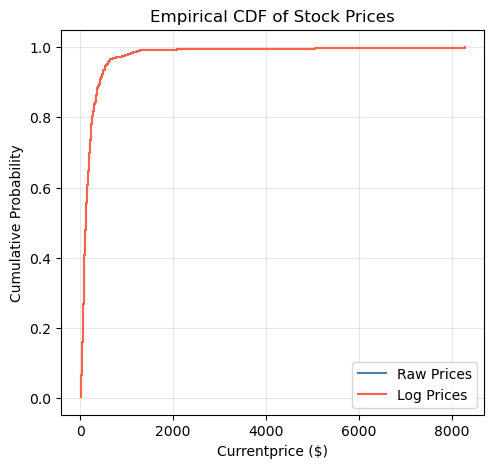

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(x_ecdf, y_ecdf, where='post', color='steelblue', label='Raw Prices')
plt.step(np.expm1(x_log_ecdf), y_log_ecdf, where='post', color='tomato', label='Log Prices')
plt.xlabel('Currentprice ($)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Stock Prices')
plt.legend()
plt.grid(alpha=0.3)

In [92]:
x_ecdf, y_ecdf = ecdf(caps)
x_log_ecdf, y_log_ecdf = ecdf(log_caps)

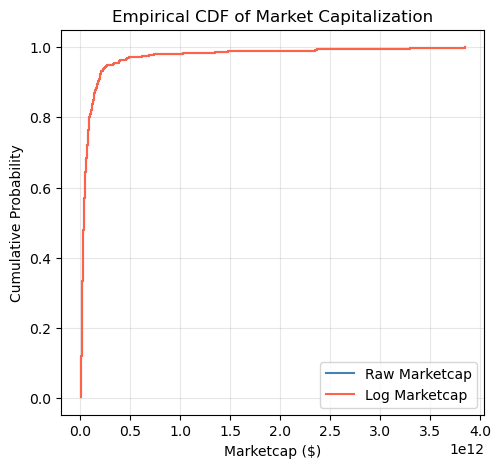

In [90]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(x_ecdf, y_ecdf, where='post', color='steelblue', label='Raw Marketcap')
plt.step(np.expm1(x_log_ecdf), y_log_ecdf, where='post', color='tomato', label='Log Marketcap')
plt.xlabel('Marketcap ($)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Market Capitalization')
plt.legend()
plt.grid(alpha=0.3)

## KDE

In [78]:
kde = gaussian_kde(log_prices, bw_method='scott')
grid = np.linspace(log_prices.min(), log_prices.max(), 512)
density = kde(grid)

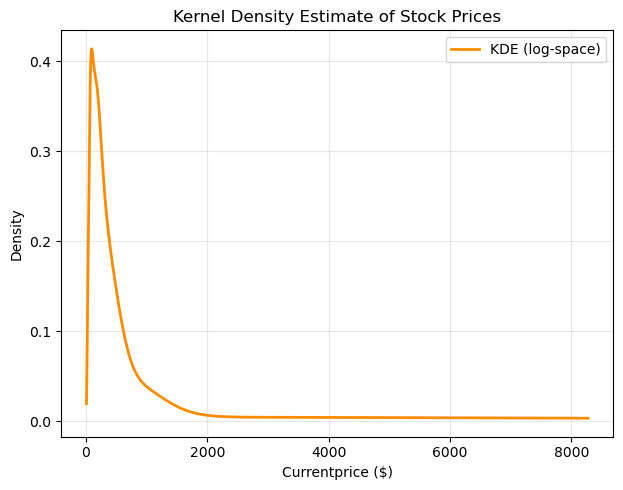

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(np.expm1(grid), density, color='darkorange', lw=2, label='KDE (log-space)')
plt.xlabel('Currentprice ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Stock Prices')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [93]:
kde = gaussian_kde(log_caps, bw_method='scott')
grid = np.linspace(log_caps.min(), log_caps.max(), 512)
density = kde(grid)

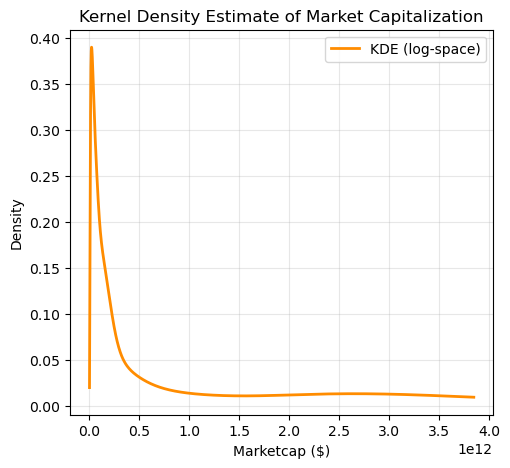

In [94]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(np.expm1(grid), density, color='darkorange', lw=2, label='KDE (log-space)')
plt.xlabel('Marketcap ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Market Capitalization')
plt.legend()
plt.grid(alpha=0.3)

## Data Cleaning and Feature Engineering

In [61]:
# sector-level medians for sparse numeric fields
for col in ['Ebitda', 'Revenuegrowth', 'Fulltimeemployees']:
    df[col] = df.groupby('Sector')[col].transform(lambda x: x.fillna(x.median()))
# categorical
df['State'] = df['State'].fillna('International')

In [68]:
# Trim top 1% outliers
price_cutoff = df['Currentprice'].quantile(0.99)
cap_cutoff   = df['Marketcap'].quantile(0.99)
df_trim = df[(df['Currentprice'] <= price_cutoff) & (df['Marketcap'] <= cap_cutoff)].copy()
print(f"Trimmed dataset shape: {df_trim.shape} (removed {(1 - len(df_trim)/len(df))*100:.2f}% of rows)")

Trimmed dataset shape: (490, 16) (removed 2.39% of rows)


In [69]:
# Features trasformations
df_trim['logPrice']      = np.log1p(df_trim['Currentprice'])
df_trim['logMarketcap']  = np.log1p(df_trim['Marketcap'])
df_trim['arcsinhEbitda'] = np.arcsinh(df_trim['Ebitda'])
df_trim['logEmployees']  = np.log1p(df_trim['Fulltimeemployees'])

# Feature sets
price_features   = ['logMarketcap','arcsinhEbitda','Revenuegrowth','Weight','logEmployees']
mktcap_features  = ['arcsinhEbitda','Revenuegrowth','Weight','logEmployees']

In [70]:
def gaussian_kernel(u): return np.exp(-0.5*u**2)/np.sqrt(2*np.pi)

def nw_predict(X_train, y_train, X_query, h=0.5):
    X_train, y_train = np.asarray(X_train,float), np.asarray(y_train,float)
    y_mean = np.mean(y_train)
    preds = np.empty(X_query.shape[0])
    for i, x0 in enumerate(X_query):
        d = np.linalg.norm(X_train - x0, axis=1)
        w = gaussian_kernel(d / h)
        s = w.sum()
        preds[i] = (w @ y_train)/s if s>1e-12 else y_mean
    return preds

def split_scale(X,y,seed=42):
    X_tr,X_tmp,y_tr,y_tmp = train_test_split(X,y,test_size=0.20,random_state=seed)
    X_va,X_te,y_va,y_te   = train_test_split(X_tmp,y_tmp,test_size=0.50,random_state=seed)
    scaler = StandardScaler().fit(X_tr)
    return scaler.transform(X_tr),scaler.transform(X_va),scaler.transform(X_te),y_tr,y_va,y_te

def tune_bandwidth(X_trs,y_tr,X_vas,y_va,grid=np.linspace(0.2,1.2,6)):
    scores=[]
    for h in grid:
        y_val_pred = nw_predict(X_trs,y_tr,X_vas,h)
        scores.append((float(h),float(r2_score(y_va,y_val_pred))))
    best_h,best_r2 = max(scores,key=lambda t:t[1])
    return best_h,best_r2,scores

def evaluate_and_plot(X_trs,y_tr,X_vas,y_va,X_tes,y_te,
                      inv_fn,ylabel,title_prefix,bw):
    X_trva=np.vstack([X_trs,X_vas]); y_trva=np.concatenate([y_tr,y_va])
    y_pred_log = nw_predict(X_trva,y_trva,X_tes,bw)
    r2_log = r2_score(y_te,y_pred_log)
    y_te_orig, y_pred_orig = inv_fn(y_te), inv_fn(y_pred_log)
    mae = np.mean(np.abs(y_pred_orig-y_te_orig))
    mse = np.mean((y_pred_orig-y_te_orig)**2)
    print(f"\n{title_prefix} (h={bw:.2f})")
    print(f"→ Test R² (log-space): {r2_log:.3f}")
    print(f"→ MAE: ${mae:,.2f} | MSE: {mse:,.2f}")
    plt.figure(figsize=(6,6))
    plt.scatter(y_te_orig,y_pred_orig,alpha=0.6,edgecolor='k',linewidth=0.5)
    lo,hi=float(min(y_te_orig.min(),y_pred_orig.min())),float(max(y_te_orig.max(),y_pred_orig.max()))
    plt.plot([lo,hi],[lo,hi],'r--',lw=2)
    plt.xlabel(f"Actual {ylabel}"); plt.ylabel(f"Predicted {ylabel}")
    plt.title(f"{title_prefix}  (h={bw:.2f})")
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

## Local Constant Least Squares Regression

Validation R² (PRICE): [(0.2, 0.073), (0.4, 0.208), (0.6, 0.216), (0.8, 0.198), (1.0, 0.184), (1.2, 0.171)]

NW — Predict Currentprice (h=0.60)
→ Test R² (log-space): 0.096
→ MAE: $93.74 | MSE: 18,161.26


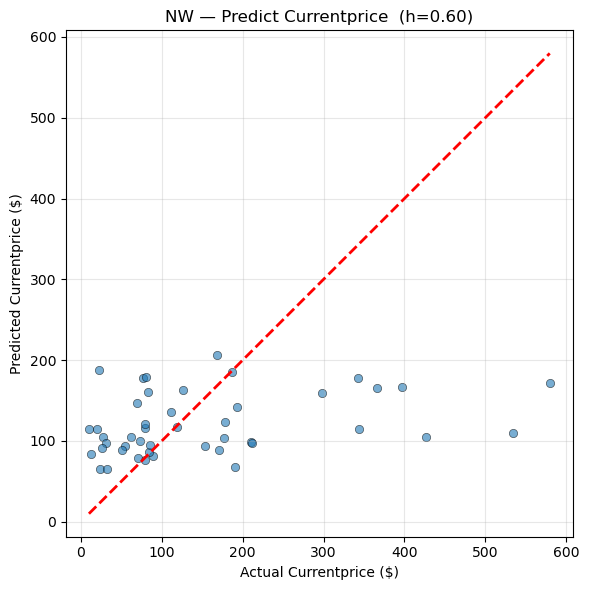

In [71]:
X_price = df_trim[price_features].to_numpy(float)
y_price = df_trim['logPrice'].to_numpy(float)
mask = np.isfinite(X_price).all(axis=1) & np.isfinite(y_price)
X_price,y_price = X_price[mask],y_price[mask]

Xp_trs,Xp_vas,Xp_tes,yp_tr,yp_va,yp_te = split_scale(X_price,y_price)
h_price,r2v_price,grid_price = tune_bandwidth(Xp_trs,yp_tr,Xp_vas,yp_va)
print("Validation R² (PRICE):",[(round(h,2),round(r2,3)) for h,r2 in grid_price])
evaluate_and_plot(Xp_trs,yp_tr,Xp_vas,yp_va,Xp_tes,yp_te,
                  np.expm1,"Currentprice ($)","NW — Predict Currentprice",h_price)

Validation R² (MARKETCAP): [(0.2, 0.864), (0.4, 0.794), (0.6, 0.717), (0.8, 0.62), (1.0, 0.532), (1.2, 0.46)]

NW — Predict Marketcap (h=0.20)
→ Test R² (log-space): 0.827
→ MAE: $9,877,297,284.81 | MSE: 170,630,076,982,012,084,224.00


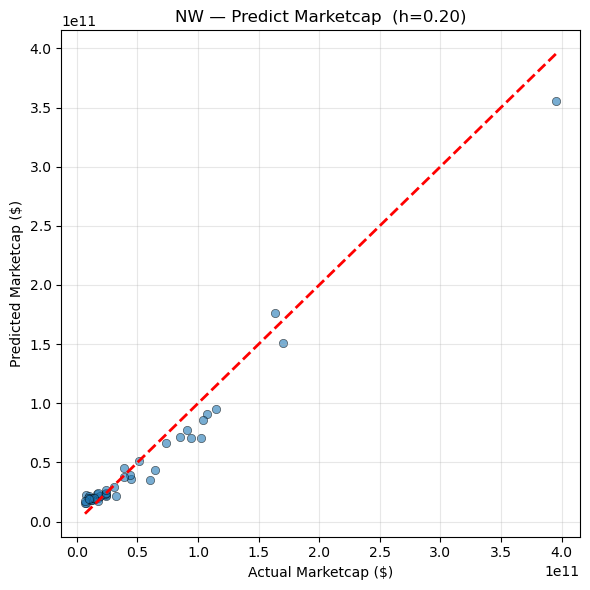

In [72]:
X_cap = df_trim[mktcap_features].to_numpy(float)
y_cap = df_trim['logMarketcap'].to_numpy(float)
mask = np.isfinite(X_cap).all(axis=1) & np.isfinite(y_cap)
X_cap,y_cap = X_cap[mask],y_cap[mask]

Xc_trs,Xc_vas,Xc_tes,yc_tr,yc_va,yc_te = split_scale(X_cap,y_cap)
h_cap,r2v_cap,grid_cap = tune_bandwidth(Xc_trs,yc_tr,Xc_vas,yc_va)
print("Validation R² (MARKETCAP):",[(round(h,2),round(r2,3)) for h,r2 in grid_cap])
evaluate_and_plot(Xc_trs,yc_tr,Xc_vas,yc_va,Xc_tes,yc_te,
                  np.expm1,"Marketcap ($)","NW — Predict Marketcap",h_cap)

Q3

After cutting out the top 1% of companies by share price and market cap, the models started to make a lot more sense. The Currentprice model still didn’t perform great (R² around 0.10), which just reinforces that individual stock prices are mostly random noise, they don’t really connect to fundamentals in a predictable way.

But the Marketcap model told a totally different story. Its R² jumped to about 0.83, showing that once we remove those extreme cases like trillion-dollar tech giants, the relationship between things like EBITDA, growth, and company size becomes really clear and consistent. Those few massive outliers were basically skewing the scale and confusing the smoother. By trimming them, we reduced that distortion and let the model focus on where the real structure is, the majority of “normal” S&P 500 companies.

Q4

When comparing both non-parametric models, the results tell two very different stories.

The first model, predicting Currentprice, performed poorly, with an R² of about 0.10 even after tuning and trimming. The predicted vs actual plot showed a clear underestimation for higher-priced companies, meaning the model couldn’t capture how share prices vary from one firm to another. This isn’t surprising, since the share price of a company doesn’t really reflect its fundamentals in a consistent way. It’s heavily influenced by things we don’t have here, like the number of shares issued, market sentiment, and investor behavior.

The second model, predicting Marketcap, worked much better. Its R² jumped up to around 0.83 after trimming outliers, showing that the kernel smoother captured a strong, nonlinear relationship between fundamentals (like EBITDA, growth, and company size) and market value. The plot for this model showed predictions hugging the red diagonal much more tightly, with only a few slight underestimations for the largest companies. This confirmed that market capitalization is far more explainable with the features in our dataset, since it’s directly tied to those fundamentals by definition.

Overall, the difference between the two models clearly shows how important target selection is. Even though both models use the same non-parametric method, one target (Marketcap) aligns naturally with the data’s structure, while the other (Currentprice) is mostly noise from a modeling standpoint.

Q5

One big takeaway from this project is that non-parametric models are honest, they don’t invent relationships that aren’t there. The weaker price model basically showed us how uncertain stock prices really are when you only look at fundamentals. It reflects the reality that prices are shaped by investor perception and market behavior, which aren’t included in our dataset. That’s actually a valuable finding because it highlights where uncertainty comes from: missing variables and data structure, not necessarily model design.

The other major challenge was handling outliers. A few companies with extremely high prices or trillion-dollar market caps threw off the scaling and bandwidth selection. After trimming the top 1% of outliers, the model became way more stable and revealed the underlying structure for the other 99% of companies. This step didn’t “fix” the data, but it made the uncertainty more realistic and interpretable.

If we wanted to take this further, we could build on the Marketcap model by adding time-series features (like past returns or volatility) or per-share ratios (like EPS or shares outstanding). Those additions would help connect fundamentals to price more directly and reduce unexplained noise. But even as-is, this non-parametric approach gave us a good sense of where the data carries real signal, and where it doesn’t.

Q6

This project showed that non-parametric models can reveal a lot about how uncertainty behaves in financial data, especially when the goal is to understand structure rather than just predict numbers. Using a Nadaraya–Watson kernel regression, we were able to explore how stock prices and company fundamentals relate without forcing a fixed linear equation.

The results were pretty telling: the Currentprice model struggled (R² ≈ 0.10), while the Marketcap model performed much stronger (R² ≈ 0.83). That gap says a lot. It shows that fundamentals explain a company’s size much better than its share price, which is more random and driven by things we didn’t measure (like share count or market sentiment). The ECDF and KDE plots backed this up by showing how skewed both distributions are, especially for the few extremely large or expensive companies.

After cleaning, transforming, and trimming the top 1% of outliers, the models became much more stable and realistic. The non-parametric approach worked great for this kind of data because it’s flexible and can adapt to nonlinear patterns without overfitting.

If we kept building on this, the next logical step would be to bring in time-series data, letting the model learn how companies move over time instead of just from one static snapshot. We could also try per-share features like earnings per share or shares outstanding, which would make the connection between fundamentals and price a lot more direct.

In short, this project didn’t just show us how well a model fits — it showed us why certain targets are predictable and others aren’t. And that’s the real insight behind understanding uncertainty.